#Fajri Yanti 




> M03 - Proyek Akhir : Image Classification Model Deployment




In [24]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-09-09 04:48:20--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.41.169.8, 2600:1408:c400:18b::317f, 2600:1408:c400:193::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.41.169.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip.1’

kagglecatsanddogs_5 100%[===================>] 786.67M   110MB/s    in 7.4s    

2022-09-09 04:48:27 (107 MB/s) - ‘kagglecatsanddogs_5340.zip.1’ saved [824887076/824887076]



In [ ]:
!unzip kagglecatsanddogs_5340.zip

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import tensorflow as tf
import random
import tensorflow as tf
import pathlib
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [10]:
label = []
path_in = []


for class_pet in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_pet):
        if class_pet == 'Cat':
            label.append(0)
        else:
            label.append(1)
        path_in.append(os.path.join("PetImages", class_pet, path))
print(path_in[0], label[0])

PetImages/Dog/8268.jpg 1


In [11]:
data = pd.DataFrame()
data['images'] = path_in
data['label'] = label
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,images,label
0,PetImages/Dog/7410.jpg,1
1,PetImages/Cat/11454.jpg,0
2,PetImages/Dog/2723.jpg,1
3,PetImages/Dog/7000.jpg,1
4,PetImages/Cat/845.jpg,0


In [12]:
data.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25002 entries, 0 to 25001
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  25002 non-null  object
 1   label   25002 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [13]:
for pet in data['images']:
    if '.jpg' not in pet:
        print(pet)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [14]:
import PIL
pil = []
for image in data['images']:
    try:
        pict = PIL.Image.open(image)
    except:
        pil.append(image)
pil

['PetImages/Dog/11702.jpg',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Cat/666.jpg']

In [15]:

data = data[data['images']!='PetImages/Dog/Thumbs.db']
data = data[data['images']!='PetImages/Cat/Thumbs.db']
data = data[data['images']!='PetImages/Cat/666.jpg']
data = data[data['images']!='PetImages/Dog/11702.jpg']
len(data)

24998

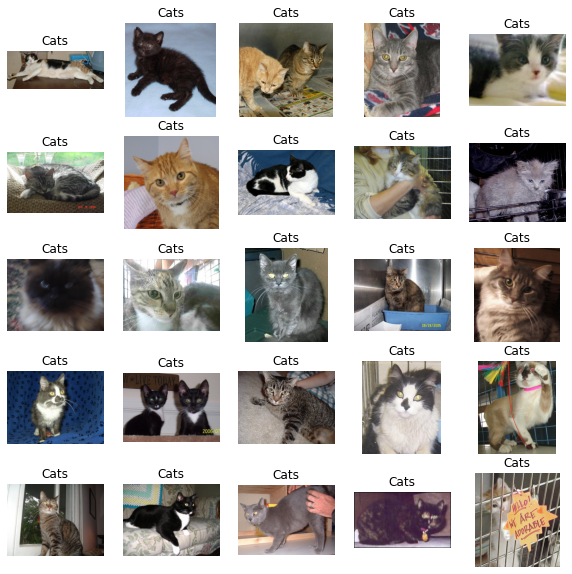

In [16]:
plt.figure(figsize=(10,10))
temp = data[data['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    pict = load_img(file)   
    pict = np.array(pict)
    plt.imshow(pict)
    plt.title('Cats')
    plt.axis('off')


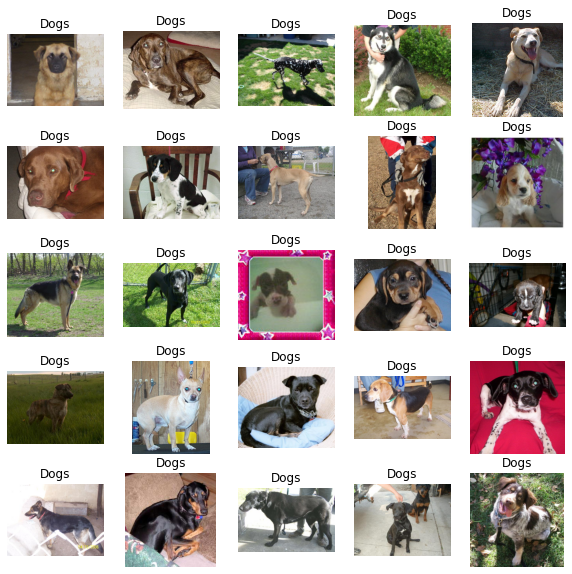

In [17]:
plt.figure(figsize=(10,10))
temp = data[data['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    pict = load_img(file)   
    pict = np.array(pict)
    plt.imshow(pict)
    plt.title('Dogs')
    plt.axis('off')

In [18]:
data['label'] = data['label'].astype('str')
data.head()


,images,label
0,PetImages/Dog/7410.jpg,1
1,PetImages/Cat/11454.jpg,0
2,PetImages/Dog/2723.jpg,1
3,PetImages/Dog/7000.jpg,1
4,PetImages/Cat/845.jpg,0


In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [19]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 40, 
    zoom_range = 0.2,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

traindata_gen = train_generator.flow_from_dataframe(
    train,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

valdata_gen = val_generator.flow_from_dataframe(
    test,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [21]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
            Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
            MaxPool2D((2,2)),
            Conv2D(32, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Conv2D(64, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(1, activation='sigmoid')
]) 

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [22]:
accuracy_threshold = 98e-2
class cb(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'training has been stopped.')
            self.model.stop_training = True

In [30]:
history = model.fit(traindata_gen, epochs=10, validation_data=valdata_gen, callbacks = [cb()])

Epoch 1/10
40/40 [==============================] - 124s 3s/step - loss: 0.1719 - accuracy: 0.9307 - val_loss: 0.2766 - val_accuracy: 0.8900
Epoch 2/10
40/40 [==============================] - 123s 3s/step - loss: 0.1688 - accuracy: 0.9308 - val_loss: 0.2968 - val_accuracy: 0.8814
Epoch 3/10
40/40 [==============================] - 123s 3s/step - loss: 0.1798 - accuracy: 0.9278 - val_loss: 0.2811 - val_accuracy: 0.8886
Epoch 4/10
40/40 [==============================] - 123s 3s/step - loss: 0.1659 - accuracy: 0.9328 - val_loss: 0.2903 - val_accuracy: 0.8844
Epoch 5/10
40/40 [==============================] - 123s 3s/step - loss: 0.1680 - accuracy: 0.9312 - val_loss: 0.2924 - val_accuracy: 0.8872
Epoch 6/10
40/40 [==============================] - 122s 3s/step - loss: 0.1526 - accuracy: 0.9377 - val_loss: 0.2945 - val_accuracy: 0.8882
Epoch 7/10
40/40 [==============================] - 122s 3s/step - loss: 0.1521 - accuracy: 0.9398 - val_loss: 0.2975 - val_accuracy: 0.8846
Epoch 8/10
40

<Figure size 432x288 with 0 Axes>

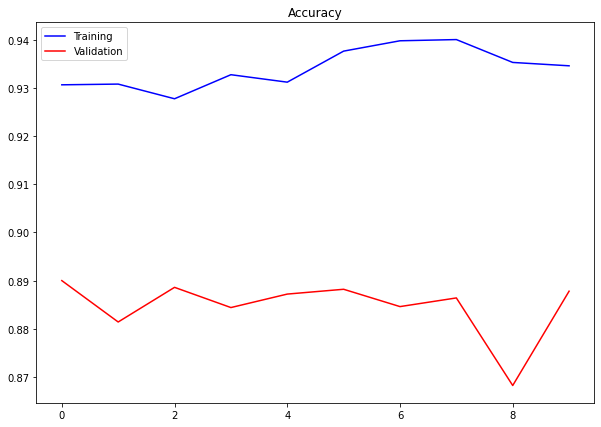

<Figure size 432x288 with 0 Axes>

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.figure(figsize=(10, 7))
plt.plot(epochs, acc, 'b', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.title('Accuracy')
plt.legend()
plt.figure()


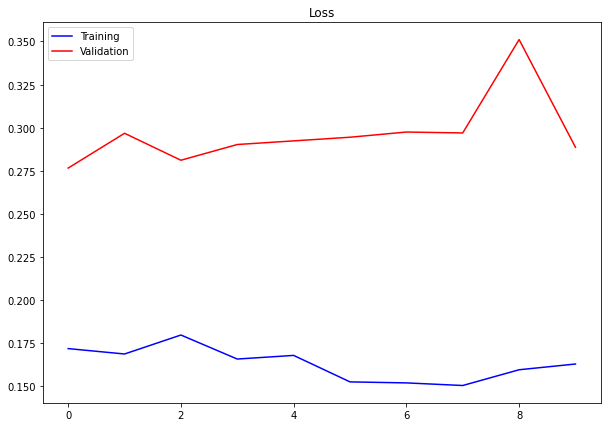

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 7))
plt.plot(epochs, loss, 'b', label='Training')
plt.plot(epochs, val_loss, 'r', label='Validation')
plt.title('Loss')
plt.legend()
plt.show()

In [34]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
 
# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('dogcat_imgclassification.tflite')
tflite_model_file.write_bytes(tflite_model)

25792132